In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Carga de Data

Para la recopilación de datos se utilizo el sitio llamado "Explorador Solar", que corresponde a una herramienta desarrollada por el Ministerio de Energía de Chile que permite analizar el recurso solar y datos meteorológicos en distintas regiones del país.

En particular, se obtuvo los datos de la planta Parque Solar Bolero, y es el primer Proyecto desarrollado por TCI para BIOSAR CHILE SpA. La empresa francesa EDF Energies Nouvelles (EDF EN) y la japonesa Marubeni ostentan a partes iguales la propiedad de este proyecto. Se trata de un Parque Solar Fotovoltaico, localizado en el desierto de Atacama, en el norte de Chile, que inició su construcción en el año 2016. TCI tuvo a su cargo el montaje de las estructuras y los módulos fotovoltaicos. La planta cuenta con una potencia instalada de 146 MW y está conformada por 475.000 módulos fotovoltaicos colocados en sistemas de seguimiento y cubriendo una superficie de más de 500 hectáreas.


Las variables climaticas utilizados son las siguientes:

*   Radiación global: glb [W/m2]
*   Radiación directa: dir [W/m2]
*   Radiación Difusa: dif [W/m2]
*   Radiación Difusa Reflejada: sct [W/m2]
*   Radiación Difusa Global Horizonatal: ghi [W/m2]
*   Radiación Directa Horizontal:  dirh [W/m2]
*   Radiación Difusa Horizontal: difh [W/m2]
*   Radiación Directa Normal: dni [W/m2]
*   Temperatura: temp [C]
*   Velocidad del viento: vel [m/s]
*   shadow: "1 o 0"
*   cloud: "1 o 0"




El sitio web no entrega directamente los datos de generación. Sin embargo Para estimar la generación diaria de energía del Parque Solar Bolero, utilizaremos los siguientes datos:


*   Dimensiones de cada módulo fotovoltaico: 1,65 metros de largo por 1 metro de ancho, lo que da un área de 1,65 m² por módulo.

*   Cantidad de módulos instalados: 475.000.
*   Eficiencia promedio de los paneles solares: 20% (Promedio)

Si consideramos una **Radiación Directa (dir)** promedio de 770 [W/m²], la metodologia es la siguiente:


1.   Area total: 1,65 [m²] x 475.000 = 783,750 [m²]
2.   Potencia total recibida: 783,750 [m²] x 770 [W/m²]= 603,49 [MW]

Para el resto de variables de radiación, se aplico lo mismo ya que se trabajara con las unidades de MW.


Por ultimo, nos interesa obtener la generación, solar de la planta, y para esto solo utilizaremos la Radiación Directa (dir), para luego aplicar:


1.   Generación Solar: 603.49MW x 20% = 120,698 [MW]


Observación:
**texto en negrita**
* Toda la recopilación de datos de las variables climaticas es horaria.
* Se recopilo 113.857 datos historicos de variables climaticas.
* El ultimo dato historico es 2016-12-26 / 23:00:00.















In [5]:
import pandas as pd


file_path = 'Parque_Bolero.csv'

def find_data_start(file_path):
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):

            if "Fecha/Hora" in line:
                return line_number - 1
    return None

# Encontrar el inicio de los datos
data_start_line = find_data_start(file_path)

if data_start_line is not None:

    df = pd.read_csv(file_path, skiprows=data_start_line)
    df = df.drop(columns=['Fecha/Hora'])
    # Reemplazar los valores ';;' por un valor vacío o 0 sin afectar valores numéricos
    df = df.replace(';;', '', regex=True)  # Reemplazar ';;' por una cadena vacía

    # Convertir todas las columnas a tipo numérico, forzando que los errores se conviertan a NaN
    df = df.apply(pd.to_numeric, errors='coerce')

    # Rellenar los NaN con 0 si es necesario, pero sin afectar los valores válidos
    df.fillna(0, inplace=True)

    # Área total de los módulos fotovoltaicos (en m²)
    area_total = 783750

    # Ajustar las variables de radiación multiplicándolas por el área total y convirtiendo a MW
    radiacion_variables = ['glb', 'dir', 'dif', 'sct', 'ghi', 'dirh', 'difh', 'dni']
    for var in radiacion_variables:
        # Multiplicamos por el área total y convertimos a MW (dividiendo entre 1,000,000)
        df[var] = (df[var] * area_total) / 1_000_000  # En MW

    # Aplicar eficiencia del 20% solo a la variable "dir"
    eficiencia = 0.20  # 20%
    df['dir'] = df['dir'] * eficiencia

    # Cambiar el nombre de la columna "dir" a "Generación solar"
    df.rename(columns={'dir': 'Generación solar'}, inplace=True)

    # Mostrar las primeras 20 filas con los ajustes realizados
    print(df.head(20))
else:
    print("No se encontró el inicio de los datos en el archivo.")

# Guardar el DataFrame procesado en un archivo Excel
df.to_excel('Parque_Bolero_procesado.xlsx', index=False)

print("Archivo Excel creado exitosamente: Parque_Bolero_procesado.xlsx")


           glb  Generación solar        dif       sct         ghi        dirh  \
0     0.000000          0.000000   0.000000  0.000000    0.000000    0.000000   
1     0.000000          0.000000   0.000000  0.000000    0.000000    0.000000   
2     0.000000          0.000000   0.000000  0.000000    0.000000    0.000000   
3     0.000000          0.000000   0.000000  0.000000    0.000000    0.000000   
4     0.000000          0.000000   0.000000  0.000000    0.000000    0.000000   
5     0.000000          0.000000   0.000000  0.000000    0.000000    0.000000   
6     1.277513          0.000000   1.261837  0.015675    1.316700    0.000000   
7    76.352925         10.351770  22.971712  1.630200  170.669400  146.749350   
8   276.546187         48.854273  28.716600  3.558225  372.735825  342.827925   
9   476.951062         88.026098  31.444050  5.376525  563.876775  531.131700   
10  650.097112        122.042415  32.964525  6.928350  726.175725  691.847475   
11  779.384513        147.50

# Pre-procesamiento


In [7]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(dataframe, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = dataframe.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = dataframe[0:Ntrain]
    val = dataframe[Ntrain:Ntrain+Nval]
    test = dataframe[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df)

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (91084, 12)
Tamaño set de validación: (11385, 12)
Tamaño set de prueba: (11387, 12)


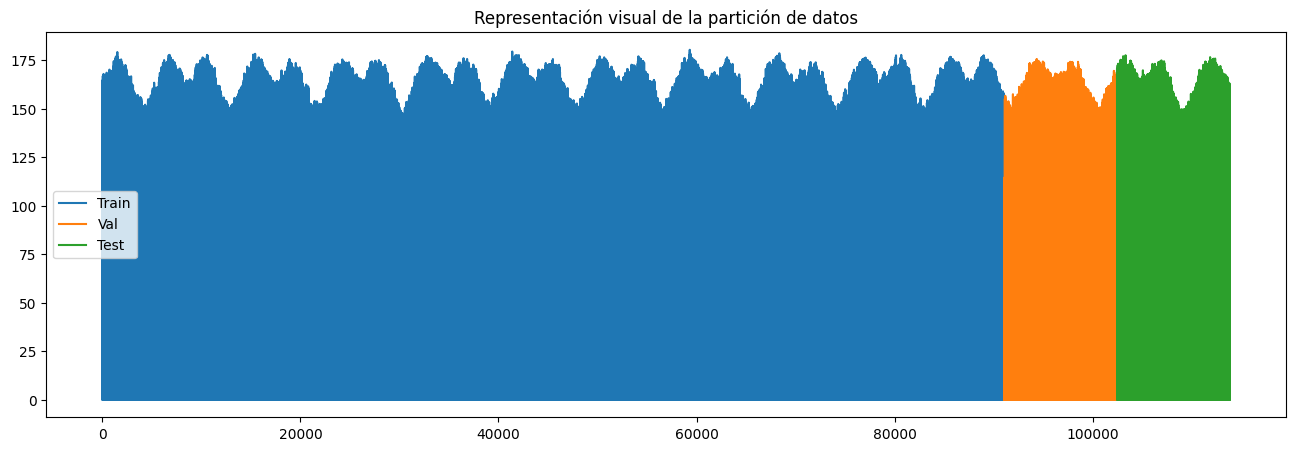

In [8]:
import matplotlib.pyplot as plt

covar = 1
col = df.columns[covar]

fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr[col], label='Train')
ax.plot(vl[col], label='Val')
ax.plot(ts[col], label='Test')
ax.set_title(f'Representación visual de la partición de datos')
plt.legend();

## Generación del dataset supervisado (entrada y salida del modelo)

In [56]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado <-- <--- ¡esta parte de la función se ejecuta en este caso!
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        # Entrada al modelo
        X.append(array[i:i+INPUT_LENGTH,0:cols])

        # Salida (el índice 1 corresponde a la columna con la variable a predecir)
        Y.append(array[i+input_length:i+input_length+output_length,1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [57]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 72    # Hiperparámetro
OUTPUT_LENGTH = 1    # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (91011, 72, 12), y_tr: (91011, 1, 1)
Set de validación - x_vl: (11312, 72, 12), y_vl: (11312, 1, 1)
Set de prueba - x_ts: (11314, 72, 12), y_ts: (11314, 1, 1)


## Escalamiento

In [58]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input, col_ref):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir


    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    # *** Implementación adicional: determinar el índice de la columna
    # que contiene la variable a predecir
    col_ref = df.columns.get_loc(col_ref)

    # Número de instantes de tiempo de entrada y de covariables
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys (teniendo en cuenta "col_ind")
    y_tr_s[:,:,0] = scalers[col_ref].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[col_ref].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[col_ref].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[col_ref]

In [59]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar (especificando la columna con la variable a predecir)
data_s, scaler = escalar_dataset(data_in, col_ref = 'Generación solar' )

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Creación y entrenamiento del modelo

In [60]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celdad de memoria (c) (128)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 72 (horas) x 12 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))

# Y lo único que cambia con respecto al modelo multivariado + uni-step es
# el tamaño deldato de salida
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=5e-4) # 5e-5
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)


EPOCHS = 50 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
356/356 - 4s - 11ms/step - loss: 0.1854 - val_loss: 0.1912
Epoch 2/50
356/356 - 3s - 8ms/step - loss: 0.1559 - val_loss: 0.1817
Epoch 3/50
356/356 - 3s - 8ms/step - loss: 0.1517 - val_loss: 0.1695
Epoch 4/50
356/356 - 3s - 8ms/step - loss: 0.1490 - val_loss: 0.1507
Epoch 5/50
356/356 - 3s - 8ms/step - loss: 0.1471 - val_loss: 0.1462
Epoch 6/50
356/356 - 5s - 15ms/step - loss: 0.1459 - val_loss: 0.1448
Epoch 7/50
356/356 - 5s - 14ms/step - loss: 0.1450 - val_loss: 0.1403
Epoch 8/50
356/356 - 5s - 14ms/step - loss: 0.1443 - val_loss: 0.1390
Epoch 9/50
356/356 - 5s - 14ms/step - loss: 0.1437 - val_loss: 0.1389
Epoch 10/50
356/356 - 3s - 9ms/step - loss: 0.1432 - val_loss: 0.1381
Epoch 11/50
356/356 - 3s - 8ms/step - loss: 0.1427 - val_loss: 0.1373
Epoch 12/50
356/356 - 5s - 14ms/step - loss: 0.1424 - val_loss: 0.1366
Epoch 13/50
356/356 - 5s - 15ms/step - loss: 0.1421 - val_loss: 0.1361
Epoch 14/50
356/356 - 3s - 8ms/step - loss: 0.1419 - val_loss: 0.1356
Epoch 15/50
356/356 - 

## Desempeño del modelo

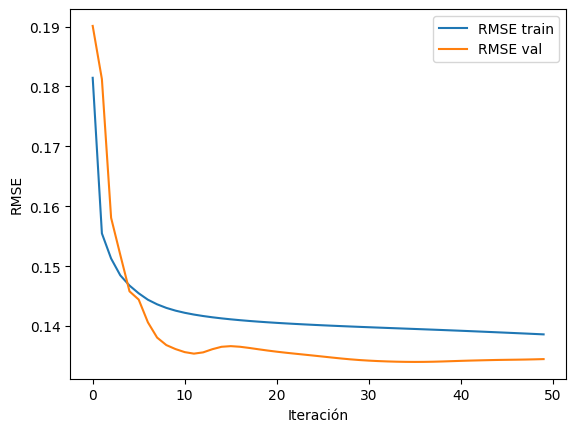

In [44]:

plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

In [45]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.8f}')
print(f'  RMSE val:\t {rmse_vl:.8f}')
print(f'  RMSE test:\t {rmse_ts:.8f}')

Comparativo desempeños:
  RMSE train:	 0.07972115
  RMSE val:	 0.09038451
  RMSE test:	 0.08612982


In [49]:
# Predicciones
predicciones_train = modelo.predict(x_tr_s, verbose=0)
predicciones_val = modelo.predict(x_vl_s, verbose=0)
predicciones_test = modelo.predict(x_ts_s, verbose=0)

# Si las predicciones tienen una dimensión extra, se aplana
predicciones_train = predicciones_train.flatten()
predicciones_val = predicciones_val.flatten()
predicciones_test = predicciones_test.flatten()

# Asegúrate de que las etiquetas de salida también sean unidimensionales
y_tr_s = y_tr_s.flatten()
y_vl_s = y_vl_s.flatten()
y_ts_s = y_ts_s.flatten()


# Calcular MAE
mae_tr = mean_absolute_error(y_tr_s, predicciones_train)
mae_vl = mean_absolute_error(y_vl_s, predicciones_val)
mae_ts = mean_absolute_error(y_ts_s, predicciones_test)

# Calcular MAPE
mape_tr = np.mean(np.abs((y_tr_s - predicciones_train) / y_tr_s)) * 100
mape_vl = np.mean(np.abs((y_vl_s - predicciones_val) / y_vl_s)) * 100
mape_ts = np.mean(np.abs((y_ts_s - predicciones_test) / y_ts_s)) * 100

# Calcular R²
r2_tr = r2_score(y_tr_s, predicciones_train)
r2_vl = r2_score(y_vl_s, predicciones_val)
r2_ts = r2_score(y_ts_s, predicciones_test)

# Calcular varianza y desviación estándar para cada métrica
var_rmse_tr = np.var(np.sqrt((predicciones_train - y_tr_s)**2))
var_rmse_vl = np.var(np.sqrt((predicciones_val - y_vl_s)**2))
var_rmse_ts = np.var(np.sqrt((predicciones_test - y_ts_s)**2))

var_mae_tr = np.var(np.abs(predicciones_train - y_tr_s))
var_mae_vl = np.var(np.abs(predicciones_val - y_vl_s))
var_mae_ts = np.var(np.abs(predicciones_test - y_ts_s))

var_mape_tr = np.var(np.abs((y_tr_s - predicciones_train) / y_tr_s) * 100)
var_mape_vl = np.var(np.abs((y_vl_s - predicciones_val) / y_vl_s) * 100)
var_mape_ts = np.var(np.abs((y_ts_s - predicciones_test) / y_ts_s) * 100)

# Imprimir resultados en pantalla
print('Comparativo desempeños con varianza:')
print(f'  MAE train:\t {mae_tr:.8f} ')
print(f'  MAE val:\t {mae_vl:.8f} ')
print(f'  MAE test:\t {mae_ts:.8f} ')
print(f'  MAPE train:\t {mape_tr:.8f} ')
print(f'  MAPE val:\t {mape_vl:.8f} ')
print(f'  MAPE test:\t {mape_ts:.8f} ')
print(f'  R² train:\t {r2_tr:.8f}')
print(f'  R² val:\t {r2_vl:.8f}')
print(f'  R² test:\t {r2_ts:.8f}')


Comparativo desempeños con varianza:
  MAE train:	 0.03655127 
  MAE val:	 0.04051445 
  MAE test:	 0.03909281 
  MAPE train:	 17.25196541 
  MAPE val:	 13.41187789 
  MAPE test:	 11.32276632 
  R² train:	 0.95585228
  R² val:	 0.94742912
  R² test:	 0.95375792


# Predicciones

<ipython-input-61-d93e41ea9ebb>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas_futuras = pd.date_range(start=ultimo_dato, periods=72, freq='H')  # 72 horas futuras


Predicciones desescaladas para los próximos 72 pasos:
[[ -0.9511314 ]
 [ -1.242689  ]
 [ -1.4438443 ]
 [ -1.4642168 ]
 [ -1.3437989 ]
 [ -1.2535579 ]
 [ -1.1535876 ]
 [ -1.1621559 ]
 [ -0.8958408 ]
 [  6.945166  ]
 [ 50.518867  ]
 [ 88.94567   ]
 [121.0233    ]
 [146.52545   ]
 [162.84354   ]
 [165.0066    ]
 [156.54517   ]
 [134.27751   ]
 [ 44.32822   ]
 [ 46.606308  ]
 [  8.659696  ]
 [  0.33092648]
 [ -2.039871  ]
 [ -1.3667192 ]
 [ -0.65946627]
 [ -0.8422488 ]
 [ -0.97594386]
 [ -1.1030058 ]
 [ -1.1860868 ]
 [ -1.2543857 ]
 [ -1.0139366 ]
 [ -0.54081136]
 [ -0.3878404 ]
 [  7.412927  ]
 [ 49.208115  ]
 [ 85.71303   ]
 [117.583435  ]
 [144.05576   ]
 [160.96516   ]
 [162.2078    ]
 [153.41417   ]
 [134.81737   ]
 [101.32428   ]
 [ 60.284542  ]
 [ 18.704926  ]
 [ -2.9834878 ]
 [ -2.1004403 ]
 [ -2.126059  ]
 [ -1.226391  ]
 [ -1.2875407 ]
 [ -1.2952919 ]
 [ -1.2742743 ]
 [ -1.1838185 ]
 [ -1.1239481 ]
 [ -0.9619035 ]
 [ -0.8755221 ]
 [ -0.66047686]
 [  5.447257  ]
 [ 48.42811   ]
 [

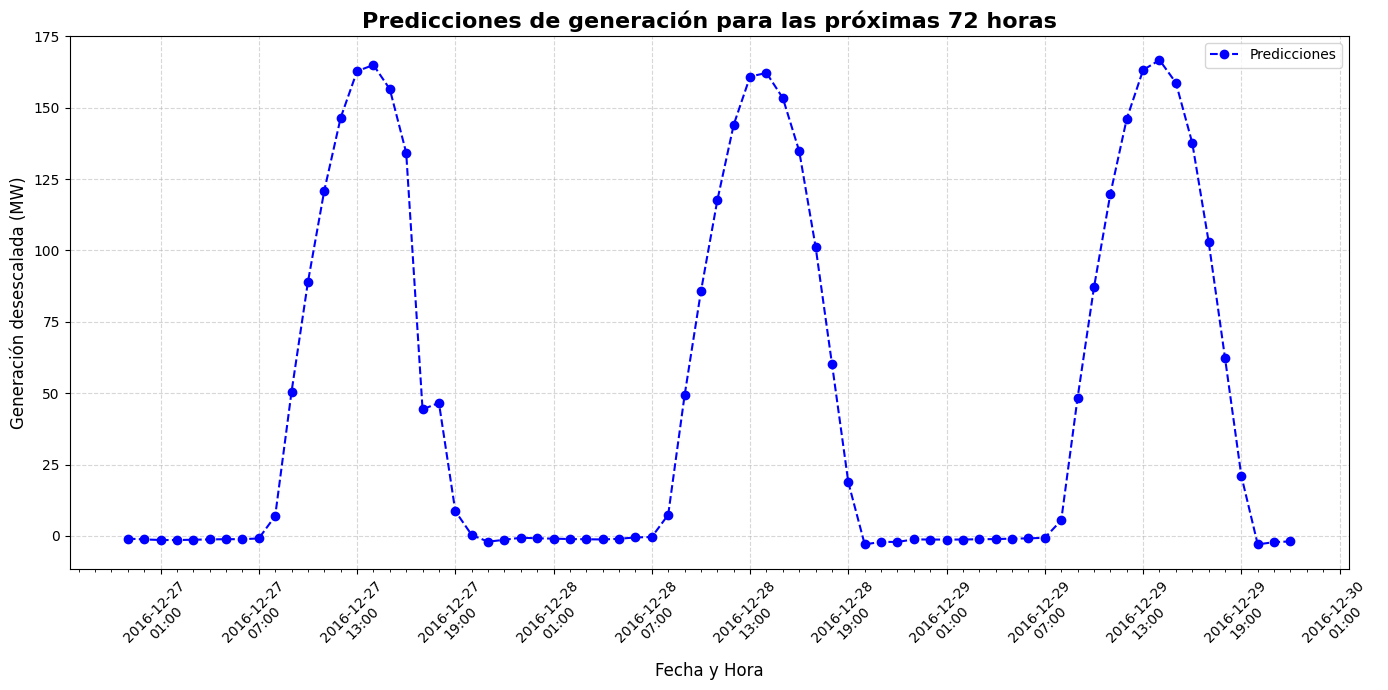

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Supongamos que 'modelo' y 'scaler' están definidos
# Obtén los últimos datos usados para entrenar el modelo
ultimos_datos = x_ts_s[-1]  # Últimos datos escalados del conjunto de test
predicciones = []

# Predicción paso a paso para 72 datos futuros
for _ in range(72):
    # Realiza la predicción
    prediccion = modelo.predict(ultimos_datos[np.newaxis, :, :], verbose=0)
    predicciones.append(prediccion[0, 0])  # Almacena la predicción
    # Actualiza los datos de entrada (shifting para futuras predicciones)
    ultimos_datos = np.roll(ultimos_datos, -1, axis=0)
    ultimos_datos[-1, 0] = prediccion[0, 0]  # La nueva predicción como entrada

# Convertir las predicciones a un arreglo NumPy y asegurarse de que sea un arreglo columna
predicciones = np.array(predicciones).reshape(-1, 1)

# Desescalar las predicciones al rango original
predicciones_desescaladas = scaler.inverse_transform(predicciones)

# Generar fechas a partir del último dato histórico
ultimo_dato = pd.to_datetime('2016-12-26 23:00:00')  # Última fecha histórica
fechas_futuras = pd.date_range(start=ultimo_dato, periods=72, freq='H')  # 72 horas futuras

# Imprimir las predicciones desescaladas
print("Predicciones desescaladas para los próximos 72 pasos:")
print(predicciones_desescaladas)

# Visualizar las predicciones con formato detallado del eje X
plt.figure(figsize=(14, 7))
plt.plot(fechas_futuras, predicciones_desescaladas, marker='o', linestyle='--', color='b', label='Predicciones')

# Personalización del eje X para mostrar horas y días claramente
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))  # Formato: día y hora
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Etiquetas cada 6 horas
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Líneas menores cada hora

plt.title('Predicciones de generación para las próximas 72 horas', fontsize=16, fontweight='bold')
plt.xlabel('Fecha y Hora', fontsize=12)
plt.ylabel('Generación desescalada (MW)', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


## DESEMPEÑO

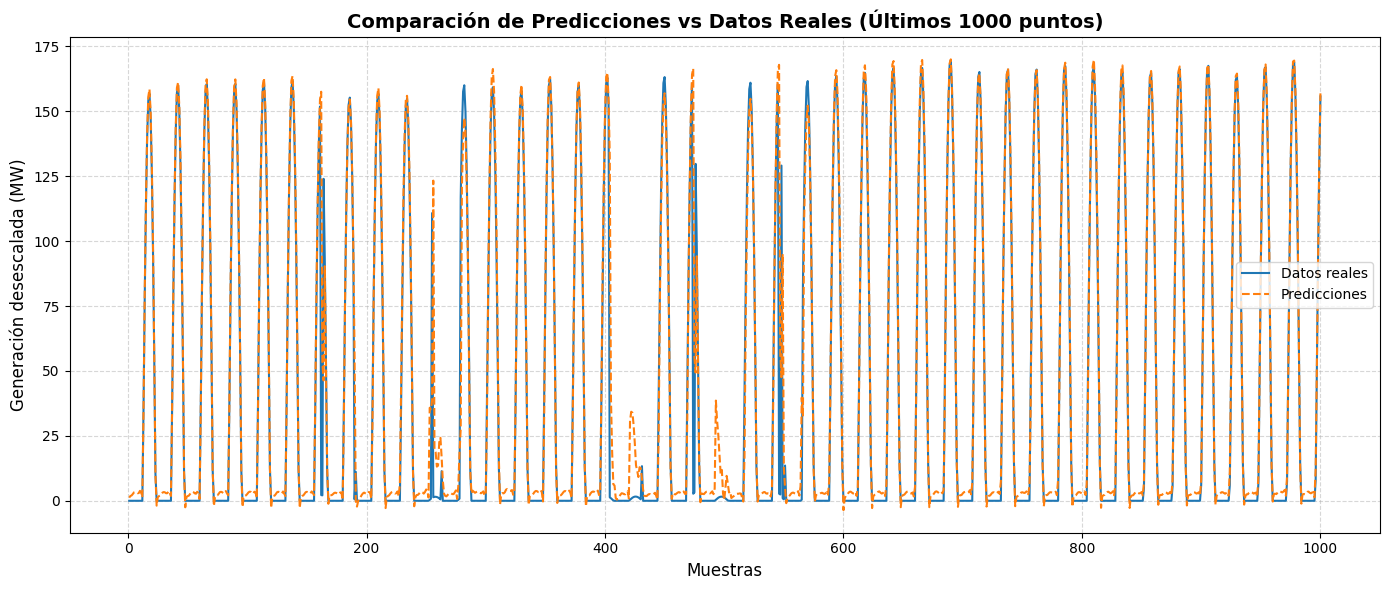

In [24]:
# Predicciones para el conjunto de validación
predicciones_validacion = modelo.predict(x_vl_s, verbose=0)  # Predicciones del conjunto de validación

# Desescalar los datos reales y las predicciones
y_reales = scaler.inverse_transform(y_vl_s.reshape(-1, 1))  # Datos reales desescalados
predicciones_desescaladas = scaler.inverse_transform(predicciones_validacion.reshape(-1, 1))  # Predicciones desescaladas

# Tomar solo los últimos 1000 puntos de datos reales y predicciones
ultimos_1000_reales = y_reales[-1000:]
ultimos_1000_predicciones = predicciones_desescaladas[-1000:]

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(range(1, 1001), ultimos_1000_reales, label='Datos reales', color='tab:blue', linewidth=1.5)
plt.plot(range(1, 1001), ultimos_1000_predicciones, label='Predicciones', color='tab:orange', linestyle='--', linewidth=1.5)

# Personalización del gráfico
plt.title('Comparación de Predicciones vs Datos Reales (Últimos 1000 puntos)', fontsize=14, fontweight='bold')
plt.xlabel('Muestras', fontsize=12)
plt.ylabel('Generación desescalada (MW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()



## Matriz de correlación

           glb         dir        dif       sct         ghi        dirh  \
0     0.000000    0.000000   0.000000  0.000000    0.000000    0.000000   
1     0.000000    0.000000   0.000000  0.000000    0.000000    0.000000   
2     0.000000    0.000000   0.000000  0.000000    0.000000    0.000000   
3     0.000000    0.000000   0.000000  0.000000    0.000000    0.000000   
4     0.000000    0.000000   0.000000  0.000000    0.000000    0.000000   
5     0.000000    0.000000   0.000000  0.000000    0.000000    0.000000   
6     1.277513    0.000000   1.261837  0.015675    1.316700    0.000000   
7    76.352925   51.758850  22.971712  1.630200  170.669400  146.749350   
8   276.546187  244.271363  28.716600  3.558225  372.735825  342.827925   
9   476.951062  440.130488  31.444050  5.376525  563.876775  531.131700   
10  650.097112  610.212075  32.964525  6.928350  726.175725  691.847475   
11  779.384513  737.500913  33.803137  8.072625  846.481350  811.275300   
12  853.644825  810.72667

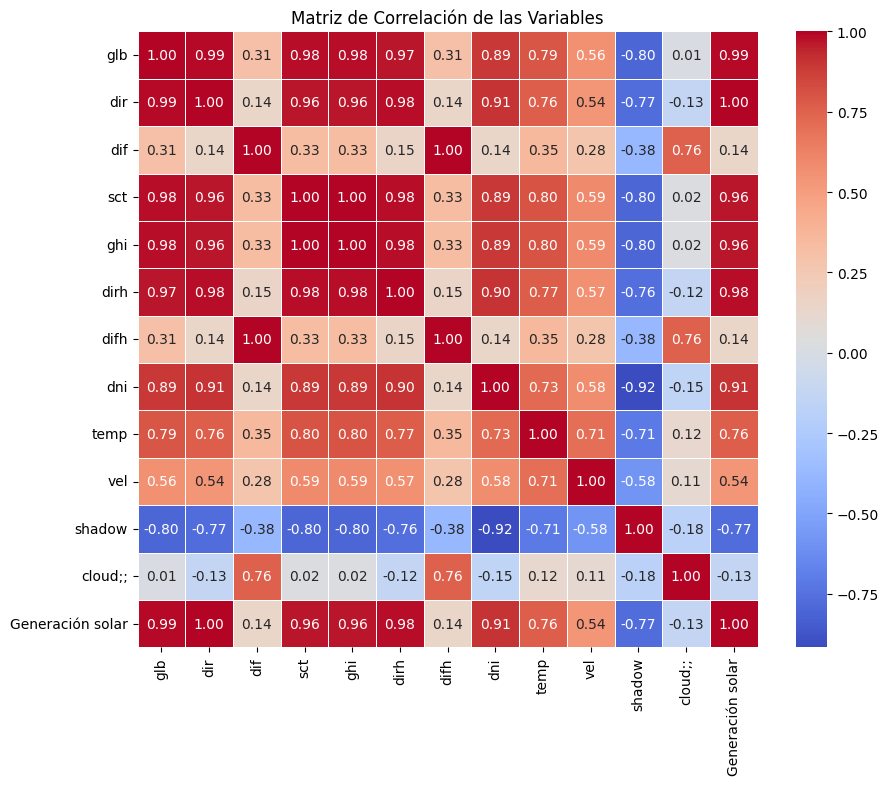

Matriz de correlación guardada como 'matriz_correlacion.xlsx'.


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ruta del archivo
file_path = 'Parque_Bolero.csv'

# Buscar el inicio de los datos
def find_data_start(file_path):
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if "Fecha/Hora" in line:
                return line_number - 1
    return None

# Encontrar el inicio de los datos
data_start_line = find_data_start(file_path)

if data_start_line is not None:
    # Cargar los datos a partir de la línea detectada
    df = pd.read_csv(file_path, skiprows=data_start_line)

    # Eliminar la columna "Fecha/Hora"
    df = df.drop(columns=['Fecha/Hora'])

    # Reemplazar los valores ';;' por un valor vacío o 0 sin afectar valores numéricos
    df = df.replace(';;', '', regex=True)  # Reemplazar ';;' por una cadena vacía

    # Convertir todas las columnas a tipo numérico, forzando que los errores se conviertan a NaN
    df = df.apply(pd.to_numeric, errors='coerce')

    # Rellenar los NaN con 0 si es necesario, pero sin afectar los valores válidos
    df.fillna(0, inplace=True)

    # Área total de los módulos fotovoltaicos (en m²)
    area_total = 783750  # m²

    # Ajustar las variables de radiación multiplicándolas por el área total y convirtiendo a MW
    radiacion_variables = ['glb', 'dir', 'dif', 'sct', 'ghi', 'dirh', 'difh', 'dni']
    for var in radiacion_variables:
        # Multiplicamos por el área total y convertimos a MW (dividiendo entre 1,000,000)
        df[var] = (df[var] * area_total) / 1_000_000  # En MW

    # Aplicar eficiencia del 20% solo a la variable "dir"
    eficiencia = 0.20  # 20%
    df['Generación solar'] = df['dir'] * eficiencia

    # Mostrar las primeras 20 filas con los ajustes realizados
    print(df.head(20))

    # Análisis de correlación
    correlation_matrix = df.corr()

    # Mostrar la matriz de correlación
    print("Matriz de correlación:")
    print(correlation_matrix)

    # Visualizar la matriz de correlación con un heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Matriz de Correlación de las Variables")
    plt.show()

    # Guardar la matriz de correlación en un archivo Excel si lo deseas
    correlation_matrix.to_excel('matriz_correlacion.xlsx')
    print("Matriz de correlación guardada como 'matriz_correlacion.xlsx'.")
else:
    print("No se encontró el inicio de los datos en el archivo.")
